In [1]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
NUM_WORDS = 10000
NUM_EPOCHS = 4

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=NUM_WORDS)

val_data = test_data[:10000]
val_labels = test_labels[:10000]

test_data = test_data[10000:]
test_labels = test_labels[10000:]

def vectorize(seqs, dim=NUM_WORDS):
    ret = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        ret[i, seq] = 1
    return ret

train_x = vectorize(train_data)
train_y = np.asarray(train_labels).astype('float32')

val_x = vectorize(val_data)
val_y = np.asarray(val_labels).astype('float32')

test_x = vectorize(test_data)
test_y = np.asarray(test_labels).astype('float32')

print("train_x.shape = {}, train_y.shape = {}".format(train_x.shape, train_y.shape))
print("val_x.shape = {}, val_y.shape = {}".format(val_x.shape, val_y.shape))
print("test_x.shape = {}, test_y.shape = {}".format(test_x.shape, test_y.shape))

train_x.shape = (25000, 10000), train_y.shape = (25000,)
val_x.shape = (10000, 10000), val_y.shape = (10000,)
test_x.shape = (15000, 10000), test_y.shape = (15000,)


In [4]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(NUM_WORDS, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
history = model.fit(train_x, train_y, epochs=NUM_EPOCHS, batch_size=512, 
                    validation_data=(val_x, val_y), verbose=0)

Instructions for updating:
Use tf.cast instead.


In [6]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


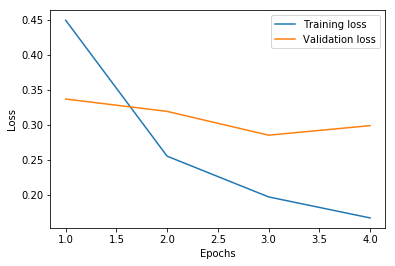

In [7]:
train_loss_history = history_dict['loss']
val_loss_history = history_dict['val_loss']
epochs = range(1, len(train_loss_history) + 1)

plt.figure()
plt.plot(epochs, train_loss_history, label='Training loss')
plt.plot(epochs, val_loss_history, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

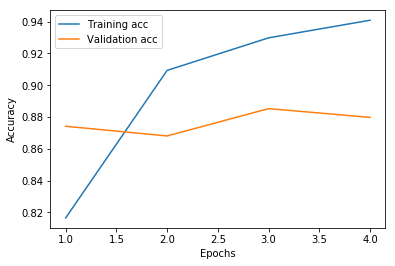

In [8]:
train_acc_history = history_dict['acc']
val_acc_history = history_dict['val_acc']
epochs = range(1, len(train_loss_history) + 1)

plt.figure()
plt.plot(epochs, train_acc_history, label='Training acc')
plt.plot(epochs, val_acc_history, label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(test_x, test_y)
print("test_loss = {}, test_acc = {}".format(test_loss, test_acc))

15000/15000 [==============================] - 1s 69us/step
test_loss = 0.29173556271394097, test_acc = 0.8854666666666666


In [10]:
sample_idx = 0
sample_data = test_data[sample_idx]
sample_x = test_x[sample_idx]
sample_y = test_y[sample_idx]

dict_word_idx = imdb.get_word_index()
dict_rev_word_idx = {idx: word for word, idx in dict_word_idx.items()}

def decode(data):
    return ' '.join(dict_rev_word_idx.get(i - 3, '?') for i in data)

predict = model.predict(sample_x.reshape(1, -1))

print("data = {}\n".format(decode(sample_data)))
print("label = {}\n".format(sample_y))
print("predict = {}".format(predict))

data = ? robert altman nicolas ? john luc ? you were expecting a fun film the entire family could enjoy these and other directors were obviously chosen because they have not followed the mainstream but created it for those that complain that they did not ? to the original story of the opera how often does the music in a film directly relate to what is going on in the film it is the mood that counts this is what i believe the directors of these movies were doing creating a contemporary mood for old operas for the most part they succeed wonderfully with all these operas who is going to like them all we could have used more beverly br br finally what is art even opera without a few naked women

label = 1.0

predict = [[0.9427416]]
